<a href="https://colab.research.google.com/github/DILSHAN565/FYP_DL_Models/blob/main/Tea_Leaf_Diseases_CNN_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow.keras.layers import Dense, Activation

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Organize data into train, valid, test dirs
os.chdir('data/Tea-Leaf-Diseases-Dataset')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 8):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 24)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 4)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [ ]:
train_path = 'data/Tea-Leaf-Diseases-Dataset/train'
valid_path = 'data/Tea-Leaf-Diseases-Dataset/valid'
test_path = 'data/Tea-Leaf-Diseases-Dataset/test'

In [ ]:
# Data generators
train_batches = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    directory=train_path, target_size=(224, 224), batch_size=10)
valid_batches = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    directory=valid_path, target_size=(224, 224), batch_size=10)
test_batches = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    directory=test_path, target_size=(224, 224), batch_size=10, shuffle=False)

Found 661 images belonging to 8 classes.
Found 192 images belonging to 8 classes.
Found 32 images belonging to 8 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the model
model = Sequential()

In [ ]:
# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
# Flatten the output before feeding into the fully connected layers
model.add(Flatten())

In [ ]:
# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))  # 8 classes for tea leaf disease classification

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,
            steps_per_epoch=len(train_batches),
            validation_data=valid_batches,
            validation_steps=len(valid_batches),
            epochs=30,
            verbose=2
)

Epoch 1/30
67/67 - 65s - loss: 0.2190 - accuracy: 0.9395 - val_loss: 0.9376 - val_accuracy: 0.6823 - 65s/epoch - 977ms/step
Epoch 2/30
67/67 - 56s - loss: 0.2146 - accuracy: 0.9349 - val_loss: 0.9586 - val_accuracy: 0.6667 - 56s/epoch - 834ms/step
Epoch 3/30
67/67 - 54s - loss: 0.1794 - accuracy: 0.9531 - val_loss: 0.9494 - val_accuracy: 0.7396 - 54s/epoch - 811ms/step
Epoch 4/30
67/67 - 57s - loss: 0.1526 - accuracy: 0.9546 - val_loss: 0.9464 - val_accuracy: 0.7292 - 57s/epoch - 846ms/step
Epoch 5/30
67/67 - 57s - loss: 0.1360 - accuracy: 0.9713 - val_loss: 1.1843 - val_accuracy: 0.6719 - 57s/epoch - 854ms/step
Epoch 6/30
67/67 - 58s - loss: 0.1276 - accuracy: 0.9576 - val_loss: 0.8893 - val_accuracy: 0.7240 - 58s/epoch - 863ms/step
Epoch 7/30
67/67 - 59s - loss: 0.0951 - accuracy: 0.9818 - val_loss: 0.9585 - val_accuracy: 0.7188 - 59s/epoch - 878ms/step
Epoch 8/30
67/67 - 56s - loss: 0.0722 - accuracy: 0.9894 - val_loss: 1.0360 - val_accuracy: 0.7292 - 56s/epoch - 830ms/step
Epoch 9/

In [ ]:
test_labels = test_batches.classes

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3 0 0 1 0 0 0 0]
 [0 1 1 0 2 0 0 0]
 [0 0 3 0 1 0 0 0]
 [0 0 0 3 0 0 0 1]
 [0 0 1 0 3 0 0 0]
 [0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 4]]


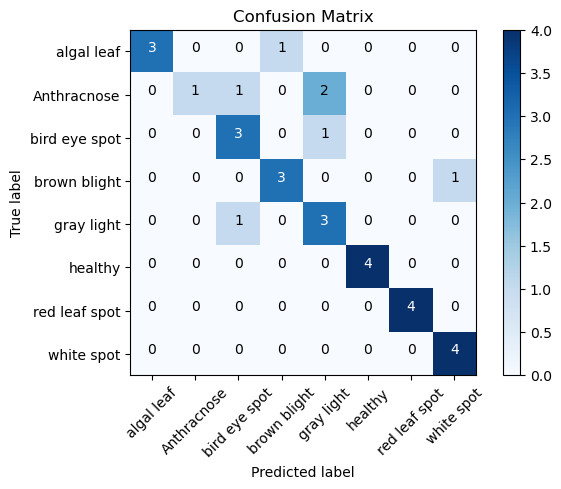

In [ ]:
cm_plot_labels = ['algal leaf','Anthracnose','bird eye spot','brown blight','gray light','healthy','red leaf spot','white spot']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_accuracy:.4f}')


NameError: name 'test_generator' is not defined

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // 32)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot the test accuracy
test_accuracies = [test_accuracy]  # List of accuracies if evaluating multiple times
plt.figure(figsize=(10, 5))
plt.plot(test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Test Accuracy')
plt.xlabel('Evaluation')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

NameError: name 'test_generator' is not defined

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_batches, steps=len(test_batches), verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

NameError: name 'model' is not defined

In [ ]:
# Evaluate the model and print the test accuracy
test_loss, test_accuracy = model.evaluate(test_batches, steps=len(test_batches))
print(f'Test Accuracy: {test_accuracy:.4f}')


NameError: name 'model' is not defined

In [ ]:
# If you want to plot the test accuracy, assuming you evaluate multiple times
test_accuracies = [test_accuracy]  # List of accuracies if evaluating multiple times
plt.figure(figsize=(10, 5))
plt.plot(test_accuracies, marker='o', linestyle='-', color='b')
plt.title('Test Accuracy')
plt.xlabel('Evaluation')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

NameError: name 'test_accuracy' is not defined

Found 661 images belonging to 8 classes.
Found 192 images belonging to 8 classes.
Found 32 images belonging to 8 classes.


Epoch 1/30


67/67 - 56s - loss: 1.7936 - accuracy: 0.2390 - val_loss: 1.3289 - val_accuracy: 0.4948 - 56s/epoch - 840ms/step
Epoch 2/30
67/67 - 51s - loss: 1.1745 - accuracy: 0.4871 - val_loss: 1.0285 - val_accuracy: 0.5417 - 51s/epoch - 766ms/step
Epoch 3/30
67/67 - 52s - loss: 1.0071 - accuracy: 0.5658 - val_loss: 1.0235 - val_accuracy: 0.5000 - 52s/epoch - 778ms/step
Epoch 4/30
67/67 - 53s - loss: 0.7855 - accuracy: 0.6959 - val_loss: 0.8503 - val_accuracy: 0.6615 - 53s/epoch - 791ms/step
Epoch 5/30
67/67 - 53s - loss: 0.6491 - accuracy: 0.7398 - val_loss: 0.8366 - val_accuracy: 0.6771 - 53s/epoch - 798ms/step
Epoch 6/30
67/67 - 52s - loss: 0.5893 - accuracy: 0.7731 - val_loss: 0.8028 - val_accuracy: 0.6719 - 52s/epoch - 775ms/step
Epoch 7/30
67/67 - 53s - loss: 0.4948 - accuracy: 0.8139 - val_loss: 0.8684 - val_accuracy: 0.6198 - 53s/epoch - 794ms/step
Epoch 

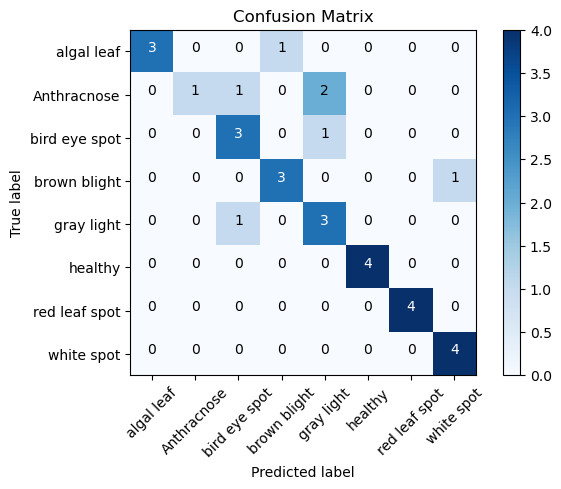

In [ ]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, accuracy_score

# Organize data into train, valid, test directories
os.chdir('data/Tea-Leaf-Diseases-Dataset')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 8):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 24)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 4)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

# Data generators
train_path = 'data/Tea-Leaf-Diseases-Dataset/train'
valid_path = 'data/Tea-Leaf-Diseases-Dataset/valid'
test_path = 'data/Tea-Leaf-Diseases-Dataset/test'

train_batches = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    directory=train_path, target_size=(224, 224), batch_size=10)
valid_batches = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    directory=valid_path, target_size=(224, 224), batch_size=10)
test_batches = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    directory=test_path, target_size=(224, 224), batch_size=10, shuffle=False)

# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output before feeding into the fully connected layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))  # 8 classes for tea leaf disease classification

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=30,
          verbose=2)

# Predict the classes of the test set
test_batches.reset()
predictions = model.predict(test_batches, steps=len(test_batches), verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_batches.classes

# Calculate accuracy
test_accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix
cm_plot_labels = ['algal leaf','Anthracnose','bird eye spot','brown blight','gray light','healthy','red leaf spot','white spot']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Assuming you have already trained your model and obtained predictions on test data
# y_true are the true labels, and y_pred are the predicted labels
y_true = [...]  # True labels of the test data
y_pred = [...]  # Predicted labels of the test data

# Calculate the accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print the accuracy
print("Test Accuracy:", accuracy)


Found 661 images belonging to 8 classes.
Found 192 images belonging to 8 classes.
Found 32 images belonging to 8 classes.


Epoch 1/30


67/67 - 129s - loss: 1.7575 - accuracy: 0.2648 - val_loss: 1.2800 - val_accuracy: 0.3594 - 129s/epoch - 2s/step
Epoch 2/30
67/67 - 156s - loss: 1.0966 - accuracy: 0.5446 - val_loss: 0.9544 - val_accuracy: 0.6198 - 156s/epoch - 2s/step
Epoch 3/30
67/67 - 103s - loss: 0.8944 - accuracy: 0.6369 - val_loss: 0.8719 - val_accuracy: 0.6562 - 103s/epoch - 2s/step
Epoch 4/30
67/67 - 137s - loss: 0.6905 - accuracy: 0.7262 - val_loss: 0.7865 - val_accuracy: 0.6979 - 137s/epoch - 2s/step
Epoch 5/30
67/67 - 136s - loss: 0.5379 - accuracy: 0.8033 - val_loss: 0.8076 - val_accuracy: 0.6667 - 136s/epoch - 2s/step
Epoch 6/30
67/67 - 163s - loss: 0.5370 - accuracy: 0.7821 - val_loss: 0.9855 - val_accuracy: 0.6510 - 163s/epoch - 2s/step
Epoch 7/30
67/67 - 150s - loss: 0.4712 - accuracy: 0.8260 - val_loss: 0.7484 - val_accuracy: 0.7083 - 150s/epoch - 2s/step
Epoch 8/30
6

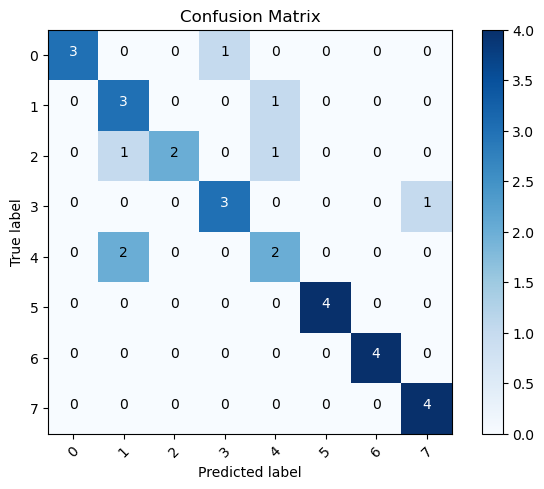

In [ ]:
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import itertools

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import confusion_matrix, accuracy_score

# Organize data into train, valid, test directories
os.chdir('data/Tea-Leaf-Diseases-Dataset')
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 8):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 24)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 4)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

# Data generators
train_path = 'data/Tea-Leaf-Diseases-Dataset/train'
valid_path = 'data/Tea-Leaf-Diseases-Dataset/valid'
test_path = 'data/Tea-Leaf-Diseases-Dataset/test'

train_batches = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    directory=train_path, target_size=(224, 224), batch_size=10)
valid_batches = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    directory=valid_path, target_size=(224, 224), batch_size=10)
test_batches = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    directory=test_path, target_size=(224, 224), batch_size=10, shuffle=False)

# Define the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output before feeding into the fully connected layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))  # 8 classes for tea leaf disease classification

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=30,
          verbose=2)

# Predict the classes of the test set
test_batches.reset()
predictions = model.predict(test_batches, steps=len(test_batches), verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_batches.classes

# Calculate accuracy
test_accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix
cm_plot_labels = ['0','1','2','3','4','5','6','7'] # class names
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
plt.show()


Test Accuracy: 0.7812
Confusion matrix, without normalization
[[3 0 0 1 0 0 0 0]
 [0 3 0 0 1 0 0 0]
 [0 1 2 0 1 0 0 0]
 [0 0 0 3 0 0 0 1]
 [0 2 0 0 2 0 0 0]
 [0 0 0 0 0 4 0 0]
 [0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 4]]


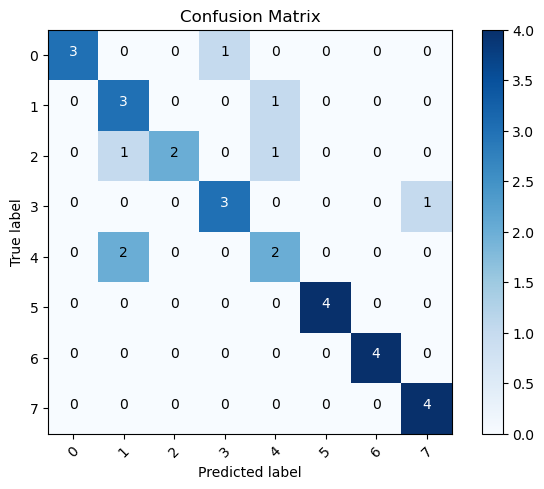

In [ ]:
# Predict the classes of the test set
test_batches.reset()
predictions = model.predict(test_batches, steps=len(test_batches), verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_batches.classes

# Calculate accuracy
test_accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix
cm_plot_labels = ['0','1','2','3','4','5','6','7'] # class names
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
plt.show()

In [ ]:
# Predict the classes of the test set
test_batches.reset()
predictions = model.predict(test_batches, steps=len(test_batches), verbose=0)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_batches.classes

# Calculate accuracy
test_accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.7812


In [ ]:
model.summary()

NameError: name 'model' is not defined